# Linear Discriminant Analysis (LDA)

In [253]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from numpy import linalg as LA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Parameters

In [254]:
# The original data 
X = np.array([
     [40, 36],
     [11.1, 37.2],
     [30, 36.5],
     [21.4, 39.4],
     [10.7, 39.6],
     [3.4, 40.7],
     [42.0, 37.6],
     [31.1, 42.2],
     [50.0, 38.5],
     [60.4, 39.4],
     [45.7, 38.6],
     [17.3, 42.7],
     ])
Y = np.array([0,0,0,0,0,0,1,1,1,1,1,1])
k = 1  # Number of components to keep

In [255]:
X_to_print = pd.DataFrame(X, columns = ['x_1','x_2'])
print(f'The original data (i.e., matrix X):')
print(f'Number of components to keep = {k}')
X_to_print

The original data (i.e., matrix X):
Number of components to keep = 1


,x_1,x_2
0,40.0,36.0
1,11.1,37.2
2,30.0,36.5
3,21.4,39.4
4,10.7,39.6
5,3.4,40.7
6,42.0,37.6
7,31.1,42.2
8,50.0,38.5
9,60.4,39.4


# 1.   Standardize the continuous initial variables

In [256]:
X_std = (X - np.mean(X, axis=0)) / np.std(X, axis=0, ddof=1)
X_std_to_print = pd.DataFrame(X_std, columns = ['x_1_std','x_2_std'])
print(f'The standardised data (i.e., matrix X_std):')
print(f'x_1_std mean = {X_std_to_print["x_1_std"].mean():.2f}')
print(f'x_1_std std = {X_std_to_print["x_1_std"].std():.2f}')
print(f'x_2_std mean = {X_std_to_print["x_2_std"].mean():.2f}')
print(f'x_2_std std = {X_std_to_print["x_2_std"].std():.2f}')
print(Y)
X_std_to_print

The standardised data (i.e., matrix X_std):
x_1_std mean = -0.00
x_1_std std = 1.00
x_2_std mean = 0.00
x_2_std std = 1.00
[0 0 0 0 0 0 1 1 1 1 1 1]


,x_1_std,x_2_std
0,0.547102,-1.446882
1,-1.075951,-0.874489
2,-0.014508,-1.208385
3,-0.497493,0.174898
4,-1.098416,0.270297
5,-1.508391,0.794990
6,0.659424,-0.683692
7,0.047269,1.510482
8,1.108712,-0.254397
9,1.692787,0.174898


In [257]:
# X_std = np.array([
#      [0.07, -0.44],
#      [-0.79, -1.22],
#      [-1.01, -0.96],
#      [-0.14, -0.44],
#      [-0.47, 1.13],
#      [1.15, 1.65],
#      [-0.14, -0.96],
#      [-0.9, 1.13],
#      [2.23, 0.09],
#      ])
# Y = np.array([1,0,0,0,1,1,1,0,1])
# Y

# Compute W

In [258]:
X_0 = X_std[Y == 0]
cov_X_0 = np.cov(X_0, rowvar=0, bias=1)
cov_X_0

array([[ 0.49481583, -0.46802444],
       [-0.46802444,  0.69672734]])

In [259]:
X_1 = X_std[Y == 1]
cov_X_1 = np.cov(X_1, rowvar=0, bias=1)
cov_X_1

array([[ 0.59932822, -0.53490633],
       [-0.53490633,  0.84537599]])

In [260]:
W = ((len(X_0)-1)*cov_X_0 + (len(X_1)-1)*cov_X_1)/(len(X_0) + len(X_1) - 2)
W

array([[ 0.54707203, -0.50146538],
       [-0.50146538,  0.77105166]])

# Compute W_inv

In [261]:
W_inv = np.linalg.inv(W)
W_inv

array([[4.52619244, 2.9436793 ],
       [2.9436793 , 3.21139735]])

# Compute B


In [262]:
cov_all = np.cov(X_std, rowvar=0, bias=1)
B = cov_all - W
B

array([[0.36959464, 0.2319882 ],
       [0.2319882 , 0.145615  ]])

# 2.   Compute S

In [263]:
S = W_inv.dot(B)
S

array([[2.35575533, 1.47866711],
       [1.83297438, 1.1505265 ]])

# 3.   Compute the eigenvectors and eigenvalues of the covariance matrix

In [264]:
w, v = LA.eig(S)
idx = w.argsort()[::-1] # sort by Eigenvalues
w = w[idx]  # order as in idx
v = v[:,idx] # order as in idx
print(f'Eigenvalues: \n{w}\n')
print(f'Eigenvectors: \n{v.T}\n')

Eigenvalues: 
[3.50628183e+00 2.22044605e-16]

Eigenvectors: 
[[ 0.78923527  0.61409095]
 [-0.53163195  0.84697549]]



# Visualization

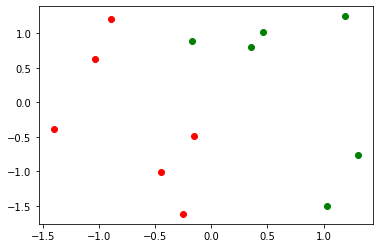

In [265]:
colors = ['r','g','b']
labels = np.unique(Y)
d = X_std.dot(v.T[:,::-1][:,:2])
for color, label in zip(colors, labels):
    class_data = d[np.flatnonzero(Y==label)]
    plt.scatter(class_data[:,0],class_data[:,1],c=color)
plt.show()

# 4.   Select the top-k eigenvectors by their corresponding eigenvalues

In [266]:
selected_w = w.T[:k]
selected_V = v.T[:k]
print(f'Selected Eigenvalues: \n{selected_w}\n')
print(f'Selected Eigenvectors: \n{selected_V}\n')

Selected Eigenvalues: 
[3.50628183]

Selected Eigenvectors: 
[[0.78923527 0.61409095]]



# 5.   Transform the original data along the axes of the LDA

In [267]:
new_X = np.matmul(X_std, selected_V.T)
nex_X_to_print = pd.DataFrame(new_X, columns = ['D1'])
print(f'Transformed LDA:')
nex_X_to_print

Transformed LDA:


,D1
0,-0.456725
1,-1.386195
2,-0.753509
3,-0.285236
4,-0.700922
5,-0.702279
6,0.100592
7,0.964879
8,0.718812
9,1.443410


W=
[[ 6.5648643  -6.01758459]
 [-6.01758459  9.25261997]]

W_inv=
[[0.3771827  0.24530661]
 [0.24530661 0.26761645]]

B=
[[4.4351357  2.78385839]
 [2.78385839 1.74738003]]

S=[[2.35575533 1.47866711]
 [1.83297438 1.1505265 ]]


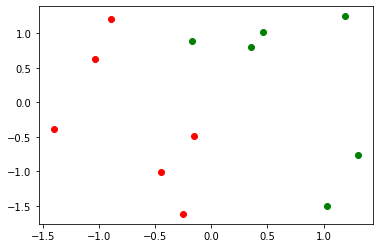

,D1,D2
0,-0.456725,-1.516331
1,-1.386195,-0.168661
2,-0.753509,-1.015760
3,-0.285236,0.412617
4,-0.700922,0.812888
5,-0.702279,1.475246
6,0.100592,-0.929641
7,0.964879,1.254211
8,0.718812,-0.804895
9,1.443410,-0.751805


In [268]:
import numpy as np

class LDA:

    def __init__(self, n_components):
        self.n_components = n_components
        self.linear_discriminants = None

    def fit(self, X, y):
        n_features = X.shape[1]
        class_labels = np.unique(y)

        # Within class scatter matrix:
        # SW = sum((X_c - mean_X_c)^2 )

        # Between class scatter:
        # SB = sum( n_c * (mean_X_c - mean_overall)^2 )

        mean_overall = np.mean(X, axis=0)
        SW = np.zeros((n_features, n_features))
        SB = np.zeros((n_features, n_features))
        for c in class_labels:
            X_c = X[y == c]
            mean_c = np.mean(X_c, axis=0)
            # (4, n_c) * (n_c, 4) = (4,4) -> transpose
            SW += (X_c - mean_c).T.dot((X_c - mean_c))

            # (4, 1) * (1, 4) = (4,4) -> reshape
            n_c = X_c.shape[0]
            mean_diff = (mean_c - mean_overall).reshape(n_features, 1)
            SB += n_c * (mean_diff).dot(mean_diff.T)

        print(f'W=\n{SW}\n')
        print(f'W_inv=\n{np.linalg.inv(SW)}\n')
        print(f'B=\n{SB}\n')
        # Determine SW^-1 * SB
        A = np.linalg.inv(SW).dot(SB)
        print(f'S={A}')
        # Get eigenvalues and eigenvectors of SW^-1 * SB
        eigenvalues, eigenvectors = np.linalg.eig(A)
        # -> eigenvector v = [:,i] column vector, transpose for easier calculations
        # sort eigenvalues high to low
        eigenvectors = eigenvectors.T
        idxs = np.argsort(abs(eigenvalues))[::-1]
        eigenvalues = eigenvalues[idxs]
        eigenvectors = eigenvectors[idxs]

        colors = ['r','g','b']
        labels = np.unique(Y)
        d = X_std.dot(eigenvectors[:,::-1][:,:2])
        for color, label in zip(colors, labels):
            class_data = d[np.flatnonzero(Y==label)]
            plt.scatter(class_data[:,0],class_data[:,1],c=color)
        plt.show()

        # store first n eigenvectors
        self.linear_discriminants = eigenvectors[0:self.n_components]

    def transform(self, X):
        # project data
        return np.dot(X, self.linear_discriminants.T)


LDA_object = LDA(n_components=2)
LDA_object.fit(X_std, Y)
X_train_modified = LDA_object.transform(X_std)
X_train_modified_to_print = pd.DataFrame(X_train_modified, columns = ['D1', 'D2'])
X_train_modified_to_print